In [19]:
# file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+BafA_CCT1_635P_HA_580_A11_460L_1.lif"
# file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/codes_yunus/8hr_BTZ_image1.tif" # van internet
file_name = f"/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+MG132_CCT1_635P_HA_580_A11_460L_3.lif"
from readlif.reader import LifFile
new = LifFile(file_name)

In [20]:
# Access a specific image directly
img_0 = new.get_image()
# Create a list of images using a generator
img_list = [i for i in new.get_iter_image()]
print(img_list)

['LifImage object with dimensions: Dims(x=1024, y=1024, z=11, t=1, m=1)']


In [21]:
from readlif.reader import LifFile
import numpy as np
import matplotlib.pyplot as plt

file_name = "/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+BafA_CCT1_635P_HA_580_A11_460L_2.lif"
lif = LifFile(file_name)

image = lif.get_image()
meta = image.info
num_channels = meta["channels"]  # Bu bir int

print(meta)
print(num_channels)

# print(f"Kanal sayısı: {num_channels}")

# # Her kanalı sırayla görselleştir
# for c in range(num_channels):
#     frame = image.get_frame(t=0, z=0, c=c)
#     img_array = np.array(frame)

#     plt.imshow(img_array, cmap="gray")
#     plt.title(f"Channel {c}")
#     plt.axis("off")
#     plt.show()


{'dims': Dims(x=1024, y=1024, z=8, t=1, m=1), 'display_dims': (1, 2), 'dims_n': {1: 1024, 2: 1024, 3: 8}, 'scale_n': {1: 5.544000286141951, 2: 5.544000286141951, 3: -2.221557165585033}, 'path': '20240312_CKR_Exp35_STHdhQ97HA_96h_+BafA_CCT1_635P_HA_580_A11_460L_2/', 'name': 'Series001', 'channels': 4, 'scale': (5.544000286141951, 5.544000286141951, -2.221557165585033, None), 'bit_depth': (16, 16, 16, 16), 'mosaic_position': [], 'channel_as_second_dim': True, 'settings': {'VersionNumber': '23', 'IsEnabledForSequentialScanning': '1', 'UserSettingName': 'S46', 'IsShowDyeEmissionSpectrum': '1', 'IsShowDyeExcitationSpectrum': '0', 'CanDoSTED': '0', 'IsSTEDActive': '0', 'IsSwitchForPulsedStedWithMpActive': '0', 'UseSystemOptimizedVoxelCalculation': '1', 'IsUserSettingNameSet': '0', 'IsHydPulsedModeCoeffntManualActive': '0', 'XGalvoMovementMode': '1', 'XGalvoMovementModeName': 'linear', 'BitSize': '16', 'MaxIntegrationTime': '0', 'ScanMode': 'xyz', 'ZUseMode': '1', 'ZUseModeName': 'z-galvo', '

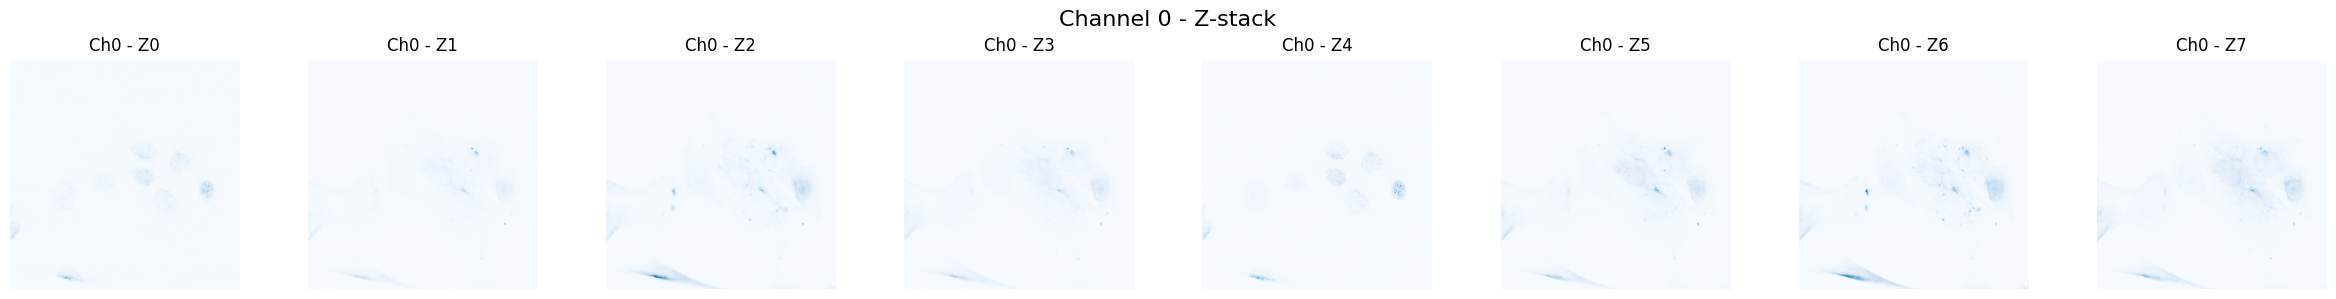

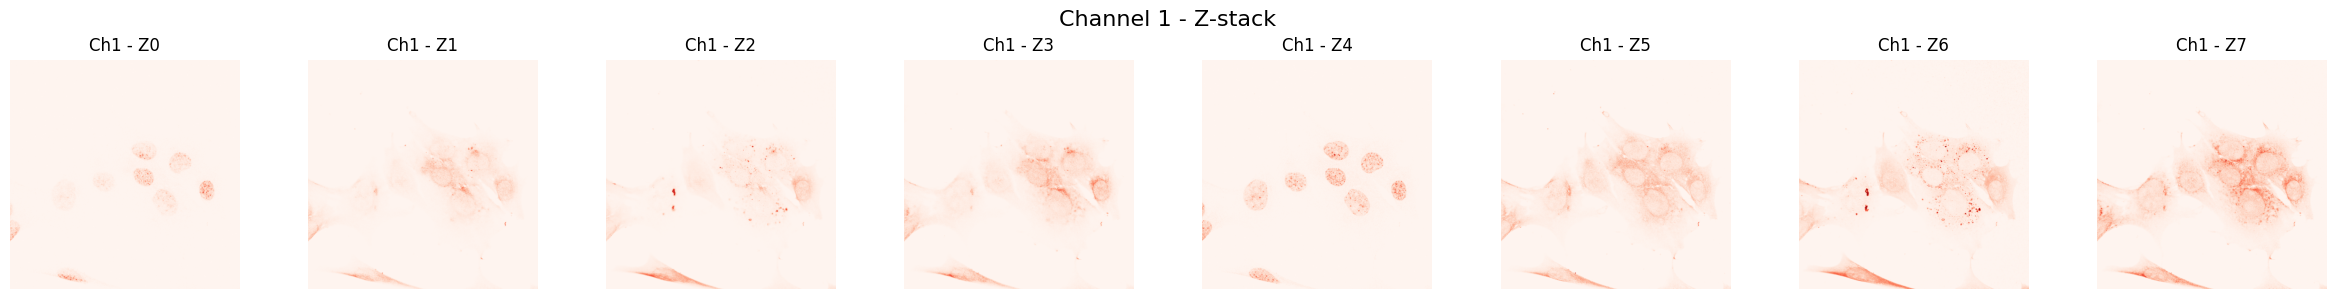

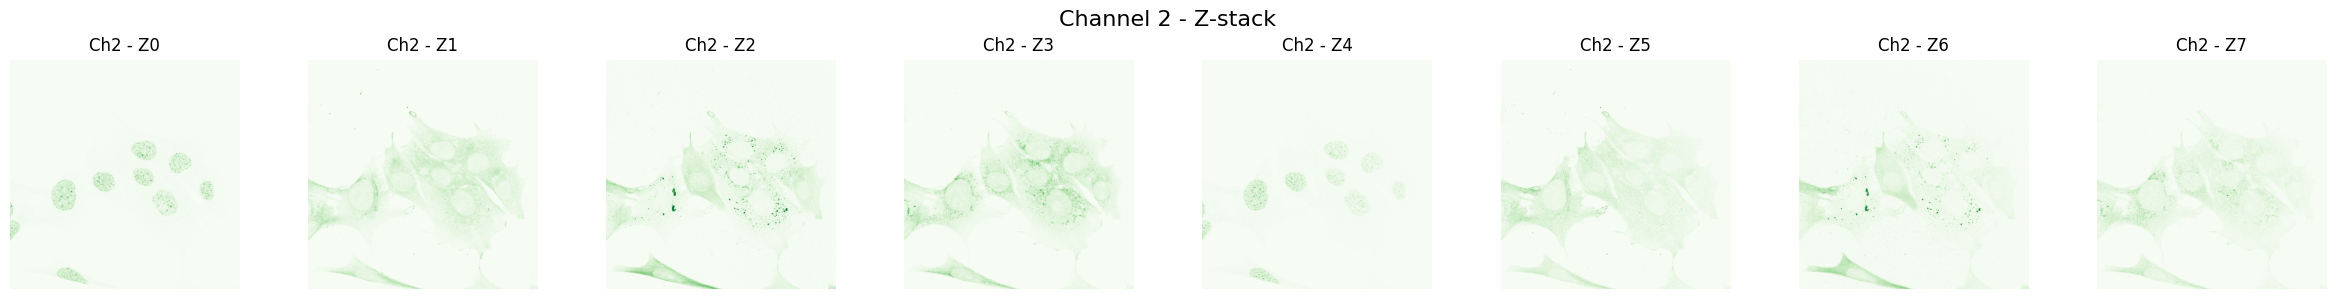

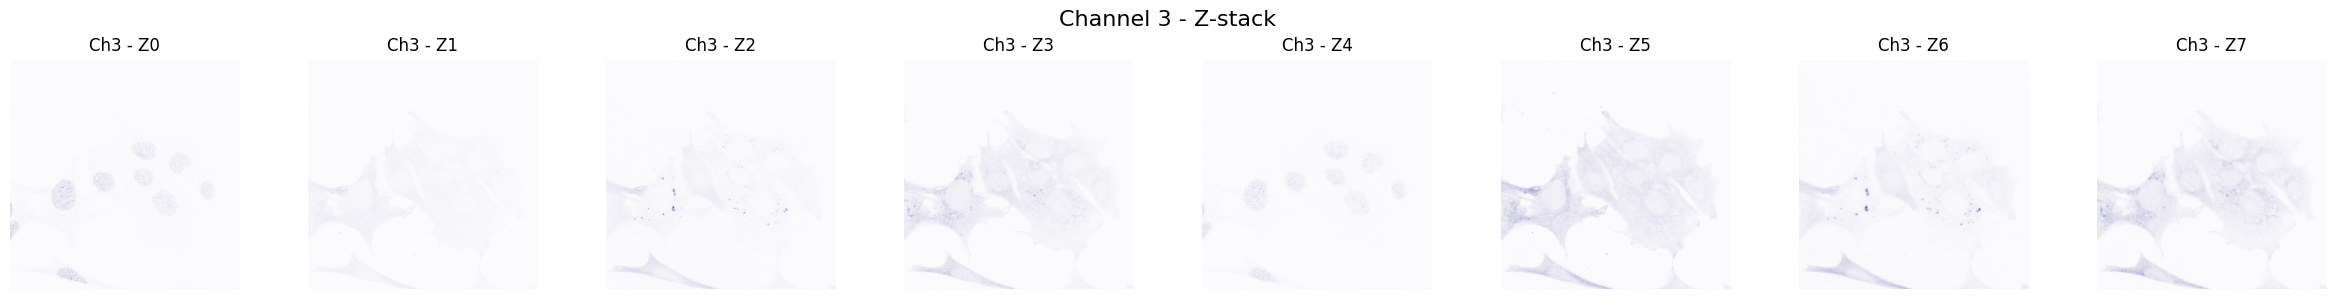

In [22]:
from readlif.reader import LifFile
import numpy as np
import matplotlib.pyplot as plt

# file_name = "/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+BafA_CCT1_635P_HA_580_A11_460L_2.lif"
lif = LifFile(file_name)

image = lif.get_image()
meta = image.info

z_slices = meta["dims"].z
num_channels = meta["channels"]

# Kanal renkleri (istenirse değiştirilebilir)
channel_colors = ['Blues', 'Reds', 'Greens', 'Purples']  # Channel 0–3

for c in range(num_channels):
    z_stack = []
    for z in range(z_slices):
        frame = image.get_frame(t=0, z=z, c=c)
        z_stack.append(np.array(frame))

    z_stack = np.stack(z_stack, axis=0)

    # Her z-slice için subplot
    fig, axs = plt.subplots(1, z_slices, figsize=(3*z_slices, 3))
    for z in range(z_slices):
        axs[z].imshow(z_stack[z], cmap=channel_colors[c])
        axs[z].set_title(f"Ch{c} - Z{z}")
        axs[z].axis("off")

    plt.suptitle(f"Channel {c} - Z-stack", fontsize=16)
    plt.tight_layout()
    plt.show()


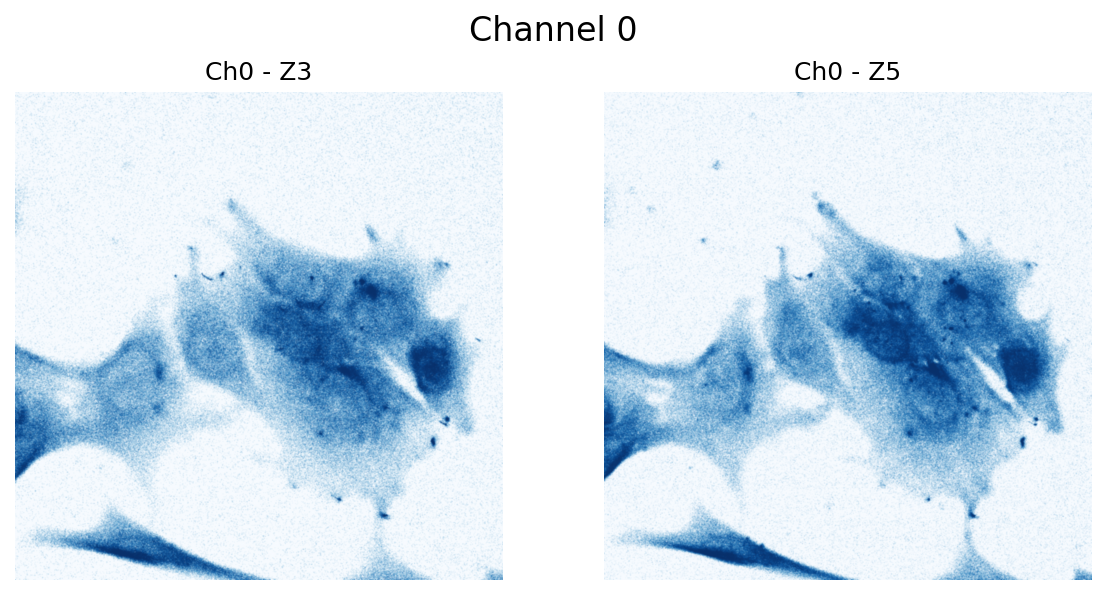

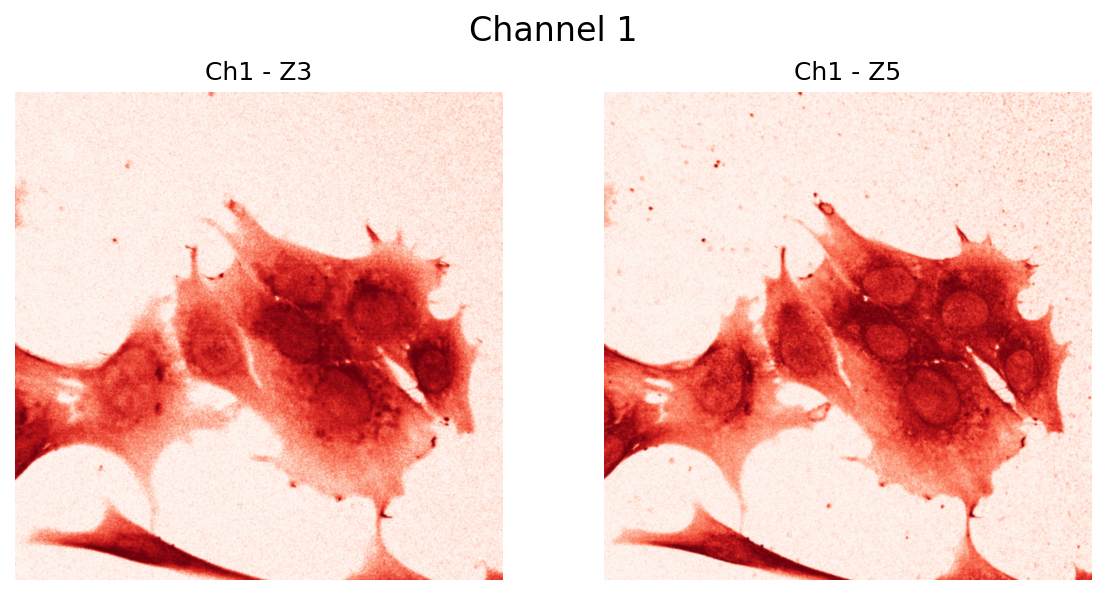

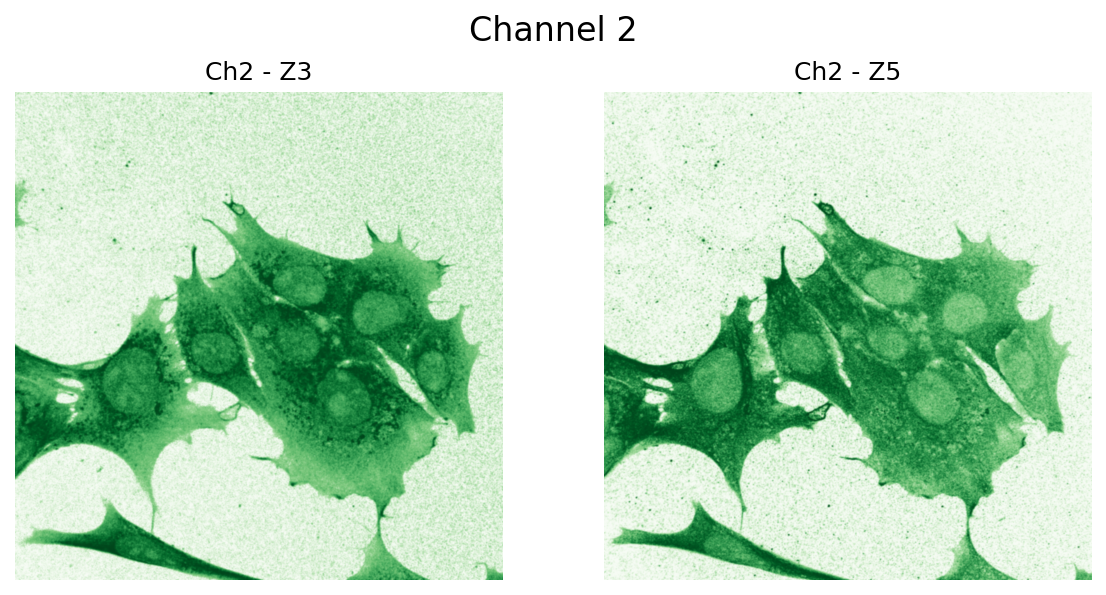

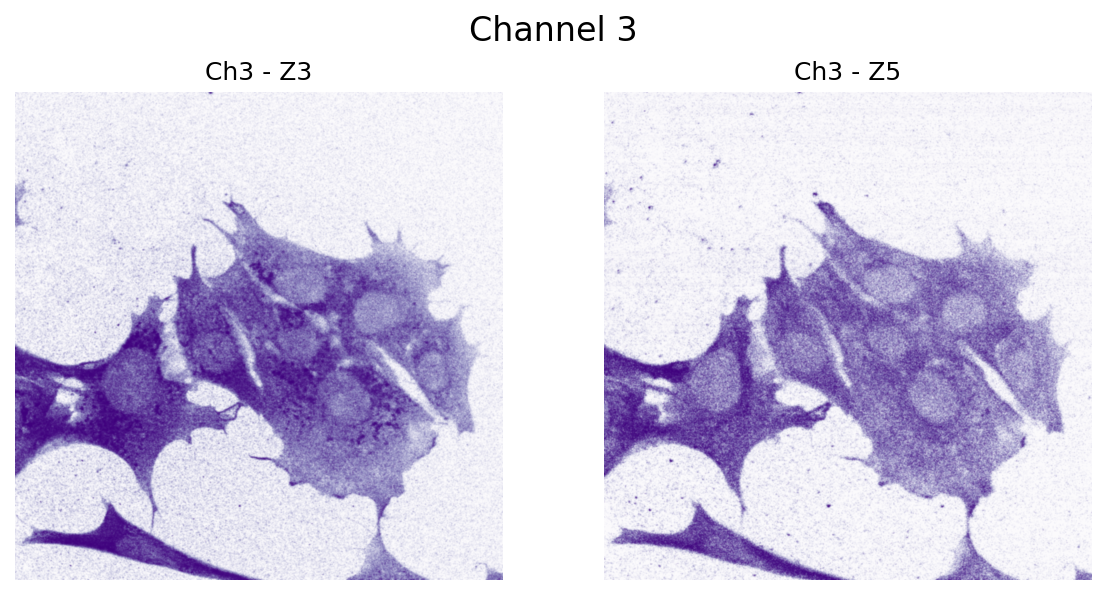

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from readlif.reader import LifFile

# Görüntü normalizasyonu
def normalize_image(img):
    img = img.astype(np.float32)
    return (img - img.min()) / (img.max() - img.min() + 1e-8)

# Kontrast iyileştirme (histogram eşitleme)
def enhance_contrast(img):
    return exposure.equalize_hist(img)

file_name = "/Users/demir/Documents/Hva_AI/afstudeerproject/Images Carolina/20240312_CKR_Exp35_STHdhQ97HA_96h_+BafA_CCT1_635P_HA_580_A11_460L_2.lif"
lif = LifFile(file_name)
image = lif.get_image()
meta = image.info

z_slices = meta["dims"].z
num_channels = meta["channels"]
channel_colors = ['Blues', 'Reds', 'Greens', 'Purples']

# Seçmek istediğin iki Z-slice
selected_z = [3, 5]

for c in range(num_channels):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
    for i, z in enumerate(selected_z):
        frame = image.get_frame(t=0, z=z, c=c)
        norm_img = normalize_image(np.array(frame))
        enhanced_img = enhance_contrast(norm_img)  # Kontrast iyileştirme
        axs[i].imshow(enhanced_img, cmap=channel_colors[c], interpolation='bicubic')
        axs[i].set_title(f"Ch{c} - Z{z}")
        axs[i].axis("off")

    plt.suptitle(f"Channel {c}", fontsize=16)
    plt.tight_layout()
    plt.show()
